## Set up environment, import data, first look

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering, AffinityPropagation, MiniBatchKMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [79]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
boston = pd.read_csv(data_path)
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


### Check column names and types, adjust

In [3]:
boston.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [32]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [80]:
# not gonna iterate, just gonna get it done
boston['10k'] = pd.to_numeric(boston['10k'], errors='coerce')
boston['25k'] = pd.to_numeric(boston['25k'], errors='coerce')
boston['35k'] = pd.to_numeric(boston['35k'], errors='coerce')
boston['30k'] = pd.to_numeric(boston['30k'], errors='coerce')
boston['5k'] = pd.to_numeric(boston['5k'], errors='coerce')
boston['half'] = pd.to_numeric(boston['half'], errors='coerce')
boston['20k'] = pd.to_numeric(boston['20k'], errors='coerce')
boston['40k'] = pd.to_numeric(boston['40k'], errors='coerce')


In [34]:
boston.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

### Check for null, adjust

In [35]:
boston.isnull().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [81]:
# gonna drop the citizenship('ctz') and state columns cuz of high missing value counts
# then drop the other rows
boston = boston.drop(['ctz', 'state'], axis=1)
boston.dropna(axis=0, how='any', inplace=True)

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

### set new columns

In [146]:
boston['gender'] = boston['gender'].astype('category')
boston['country'] = boston['country'].astype('category')
boston['city'] = boston['city'].astype('category')


boston['gender_cat'] = boston['gender'].cat.codes
boston['country_cat'] = boston['country'].cat.codes
boston['city_cat'] = boston['city'].cat.codes


In [149]:
boston.dtypes

10k             float64
name             object
division          int64
25k             float64
gender         category
age               int64
official        float64
bib              object
genderdiv         int64
35k             float64
overall           int64
pace            float64
30k             float64
5k              float64
half            float64
20k             float64
country        category
city           category
40k             float64
gender_cat         int8
country_cat        int8
city_cat          int16
dtype: object

### import estimators, set up XY

In [39]:
# init algorithms here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# frickin KMeans
from sklearn.cluster import KMeans

# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# spectral clustering
from sklearn.cluster import SpectralClustering

# affinity propogation
from sklearn.cluster import AffinityPropagation


In [188]:
# Make X and Y here
# trying out all columns
# 'country' is the target variable

agetimeX = boston.iloc[:, [5,6]]
num_X = boston.iloc[:, [0,2,3,5,8,9,10,11,12,13,14,15,18,19,21]]
all_X = boston.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21]]
y = boston.iloc[:, 20]
# don't know if y needs to be binary...

In [222]:
# split your data into training and test sets.
# roll it down to 4 features so we can graph this stuff!
pca = PCA(4).fit(X_norm)
X_norm = normalize(num_X) 
X_pca = pca.transform(X_norm) 

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.9)

In [224]:
pca.components_

array([[ 8.75507020e-03,  3.95945373e-02,  2.18861824e-02,
         8.39779656e-03, -1.53635303e-01,  3.09001613e-02,
        -5.59203696e-01,  1.43317968e-03,  2.63490558e-02,
         4.38271516e-03,  1.84949908e-02,  1.75411670e-02,
         3.54438010e-02,  2.50408021e-04,  8.11120876e-01],
       [-3.11227467e-03, -2.29106812e-01, -7.68150679e-03,
        -4.38393836e-03, -8.86750043e-01, -1.11696736e-02,
         3.85197152e-01, -5.44431321e-04, -9.32967677e-03,
        -1.57882009e-03, -6.48334312e-03, -6.14578550e-03,
        -1.32945803e-02, -3.46527187e-04,  1.10672535e-01],
       [ 1.03382701e-02,  9.48282662e-01,  2.59254914e-02,
         9.89435908e-04, -2.77841431e-01,  3.69939015e-02,
        -3.40357202e-02,  1.73008371e-03,  3.13563849e-02,
         5.19933203e-03,  2.18131845e-02,  2.06865980e-02,
         4.28208731e-02,  1.96509862e-04, -1.28477618e-01],
       [ 2.16625590e-02, -2.10921114e-01,  5.55086797e-02,
         2.19334732e-02, -3.29409106e-01,  7.93082993

looks like feature 1 is column 15, feature 2 is column 5, feature 3 is column 2, and features 4 is column 7. Those correspond to columns City, 35K, 25K, and Pace. So it looks like PCA decided that what matters is what city your from, how well you did at the 25K mark and the 35K mark and what pace you maintained. 

## Models

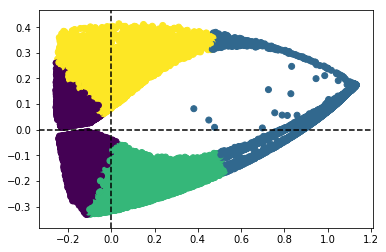

Comparing k-means clusters against the data:
country_cat  0   1   2   3   4   5   6   7   8   9  ...  68  69  70  71  72  \
row_0                                               ...                       
0             4  58  16   2   1  16  14   0   1  39 ...   6   0   4  13   1   
1             3  18   2   0   0   2   0   1   0   9 ...   2   0   0   0   2   
2             5  34   2   0   0   6   2   0   0  26 ...   9   0   0   2   0   
3             3  13   1   0   0   3   1   0   0  11 ...   1   1   0   2   0   

country_cat  73     74  75  76  77  
row_0                               
0             0  16208   8   0   1  
1             0   1900   0   0   0  
2             0   4145   5   0   0  
3             1   4686   6   1   0  

[4 rows x 78 columns]


In [212]:

y_pred = KMeans(n_clusters=4).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

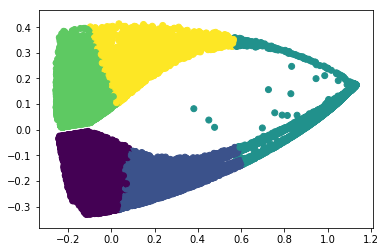

Comparing k-means clusters against the data:
country_cat  0   1   2   3   4   5   6   7   8   9  ...  68  69  70  71  72  \
row_0                                               ...                       
0             5  48  11   0   0  16   6   0   0  38 ...  10   0   1   9   1   
1             3  25   2   0   0   4   2   0   0  19 ...   5   0   0   1   1   
2             3  15   2   0   0   1   0   1   0   7 ...   2   0   0   0   1   
3             2  25   6   2   1   6   9   0   1  13 ...   1   1   3   6   0   
4             2  10   0   0   0   0   0   0   0   8 ...   0   0   0   1   0   

country_cat  73     74  75  76  77  
row_0                               
0             0   9957   7   0   1  
1             0   2972   4   0   0  
2             0   1574   0   0   0  
3             1  10151   7   0   0  
4             0   2285   1   1   0  

[5 rows x 78 columns]


In [213]:
y_pred = KMeans(n_clusters=5).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [214]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3     4
row_0                              
0      1967     0     0  4604     0
1      5009     0     0  5698     0
2         0     0     0  1022  2579
3      4354  1802     0     0     0
4         0   686  1941     0    62
5       632  1292     0     0     0


In [215]:
# Mean Shift!
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


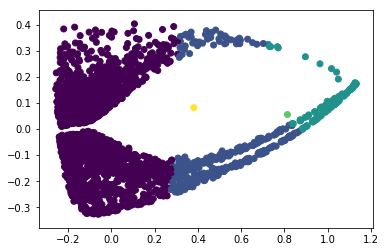

Comparing the assigned categories to the ones in the data:
col_0           0    1   2  3  4
country_cat                     
0               3    1   0  0  0
1               8    3   1  0  0
2               1    0   1  0  0
5               3    1   0  0  0
9               4    1   0  0  0
11            182   24   5  0  0
13              1    2   0  0  0
14              2    1   3  0  0
15              5    0   0  0  0
18              1    0   0  0  0
19              4    0   0  0  0
21              1    0   0  0  0
24              6    1   0  0  0
25              1    0   0  0  0
26              0    0   0  0  1
27              1    1   0  0  0
28              7    1   0  0  0
29             35    3   1  0  0
30             15    1   0  0  0
32              0    2   0  0  0
33              5    1   0  0  0
36              0    1   0  0  0
37             11    2   0  0  0
38              2    1   0  0  0
39              1    0   0  0  0
40              9    1   0  0  0
41             13

In [216]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [217]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 225


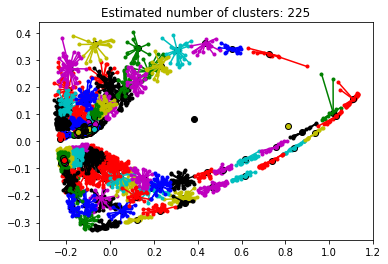

In [218]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

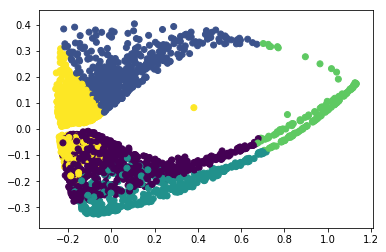

Comparing the assigned categories to the ones in the data:
col_0          0    1    2    3     4
country_cat                          
0              1    0    2    0     1
1              1    3    2    1     5
2              1    0    0    1     0
5              1    0    0    1     2
9              3    0    1    0     1
11            82   54   13    7    55
13             2    1    0    0     0
14             1    0    1    3     1
15             3    0    0    0     2
18             0    0    1    0     0
19             3    0    0    0     1
21             1    0    0    0     0
24             3    0    1    0     3
25             0    1    0    0     0
26             0    0    0    0     1
27             2    0    0    0     0
28             3    0    0    1     4
29            11    8    6    2    12
30             4    0    2    1     9
32             1    0    0    1     0
33             3    0    1    0     2
36             1    0    0    0     0
37             4    0    3   

In [219]:
# We think we know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## What did I learn?

# Thoughts

Taking a close look at the results of our estimators, and the iterations we went through, I see the first iteration of KMeans with 4 expected clusters split the data in a way that there was a group at the front, the closest to the origin, then two groups above and below 0 and another group of the tail end. Knowing that I'm looking at marathon data, it looks like the computer has grouped all the quick finishers together at the begining, both male and female, and then split the men and women into two different groups for the middle, bulk of the times, and then put all the stragglers together into a group. 

Digging a little, I found that PCA had chosen the columns City, 35K, 25K and Pace as the 4 components to keep. 

KMeans with 5 clusters still brought near to the same clusters locations.

MinibatchKmeans produced a crosstab that look like its doing quite well, in that there are zeros in a somehwhat diagonal shape.

Mean Shift's estimate_bandwidth estimated 5 clusters from looking at our PCA transformed data. It then produced a plot that was very similar in shape to KMeans. However, it did not split the data into groups above and below the 0 line.

Affinity Propogation suggested 225 clusters. A huge number compared to the number of actual countries reperesented, but perhaps the clusters are something else. The graph produced with AP is still the same shape as the others, but it splits the cloud up into many groups. This could be showing that there are more places with likely splits, or could just be noise in the data. 

Spectral clusters is the one I like the most. It produces a visual that looks as if its easy to interpret. It clusters the quick paced runners together, but also splits the above 0 group and below zero groups apart. It then also splits the below 0 group into two more groups, perhaps its found the womens group or the wheelchair racers group. The stragglers again are all grouped together. 